In [1]:
#Importing Dependencies

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings       
warnings.filterwarnings("ignore")  #avoids warnings, outputs look clean


In [2]:
#Reading the file
data = pd.read_csv('/kaggle/input/international-math-olympiad-rank-1993-2023/IMO Rank.csv') 

In [3]:
#Exploring the dataset
data

,Year,ALBANIA,ARGENTINA,ARMENIA,AUSTRALIA,AUSTRIA,AZERBAIJAN,BELGIUM,BANGLADESH,BULGARIA,...,TUNISIA,TURKEY,TAIWAN,UKRAINE,UNITED KINGDOM,URUGUAY,USA,UZBEKISTAN,VENEZUELA,VIETNAM
0,2023,80.0,59,32,23,49,54.0,63,46.0,25,...,75.0,8,10,31,13,83.0,2,49.0,104.0,7
1,2022,77.0,42,26,29,56,34.0,63,57.0,16,...,67.0,26,14,17,13,89.0,3,50.0,104.0,4
2,2021,94.0,46,37,18,64,51.0,43,43.0,18,...,56.0,35,9,6,9,88.0,4,61.0,83.0,14
3,2020,77.0,50,37,8,65,65.0,50,38.0,38,...,71.0,26,23,11,9,80.0,3,69.0,83.0,17
4,2019,80.0,53,49,18,60,51.0,68,67.0,19,...,74.0,29,21,11,20,88.0,1,63.0,105.0,7
5,2018,79.0,39,32,11,57,69.0,47,41.0,21,...,70.0,24,6,4,12,103.0,1,86.0,106.0,20
6,2017,76.0,26,41,34,70,42.0,62,26.0,18,...,79.0,35,9,14,9,92.0,4,74.0,79.0,3
7,2016,69.0,57,30,25,46,54.0,52,35.0,18,...,76.0,29,5,30,7,93.0,1,77.0,86.0,11
8,2015,77.0,52,26,6,60,48.0,56,33.0,29,...,75.0,20,18,11,22,93.0,1,58.0,96.0,5
9,2014,77.0,56,39,11,51,61.0,59,53.0,37,...,80.0,17,3,6,20,84.0,2,NaN,86.0,10


In [4]:
#Key information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 94 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    31 non-null     int64  
 1   ALBANIA                 26 non-null     float64
 2   ARGENTINA               31 non-null     int64  
 3   ARMENIA                 31 non-null     int64  
 4   AUSTRALIA               31 non-null     int64  
 5   AUSTRIA                 31 non-null     int64  
 6   AZERBAIJAN              30 non-null     float64
 7   BELGIUM                 31 non-null     int64  
 8   BANGLADESH              19 non-null     float64
 9   BULGARIA                31 non-null     int64  
 10  BOSNIA AND HERZEGOVINA  31 non-null     int64  
 11  BELARUS                 31 non-null     int64  
 12  BOLIVIA                 19 non-null     float64
 13  BRAZIL                  31 non-null     int64  
 14  CANADA                  31 non-null     int6

In [5]:
#Mean Rank of the countries
data_excluded = data.drop(columns=['Year'])
country_mean_rank = data_excluded.mean()
print(country_mean_rank)

ALBANIA       72.884615
ARGENTINA     40.709677
ARMENIA       40.483871
AUSTRALIA     19.548387
AUSTRIA       49.193548
                ...    
URUGUAY       81.840000
USA            3.387097
UZBEKISTAN    53.681818
VENEZUELA     84.740741
VIETNAM        9.354839
Length: 93, dtype: float64


In [6]:
#Top 10 performing countries based on lowest mean rank
top_10 = country_mean_rank.nsmallest(10)
print(top_10)

CHINA           1.500000
USA             3.387097
SOUTH KOREA     5.774194
VIETNAM         9.354839
TAIWAN         10.870968
JAPAN          11.516129
IRAN           11.645161
UKRAINE        14.516129
HUNGARY        14.870968
BULGARIA       15.096774
dtype: float64


In [7]:
#Storing no of rows and columns
toal_rows, total_columns = data.shape     #31 , 94

In [8]:
#Countries with the highest wins (Rank 1)

rank = 1
wins =[]  #initialising no of wins list
for i in range (total_columns):
    no_of_wins = data.iloc[:,i].value_counts().get(rank,0)  #counts no of 1's in column
    wins.append(no_of_wins)

my_dict = {} #initializing empty dict which will be country name: wins
for i,x in enumerate(wins):
    if x!=0:      #excludes countries with 0 wins
        nation = data.columns[i]    #column name
        my_dict.update({f'{nation}':x})  #updates item in dictionary

        
sorted_dict = {k: v for k,v in sorted(my_dict.items(), key =lambda item: item[1], reverse=True)} 
 #prints dictionary acc. to descending order of value(wins)
print(sorted_dict)

{'CHINA': 21, 'USA': 5, 'SOUTH KOREA': 2, 'BULGARIA': 1, 'IRAN': 1}


In [9]:
#Consistent performers based on lowest standard deviation

st_dev = data_excluded.std()
top_5_consistent = st_dev.nsmallest(5)
print(top_5_consistent)

CHINA          1.042213
USA            2.389943
SOUTH KOREA    3.913308
TAIWAN         5.168765
JAPAN          5.176041
dtype: float64


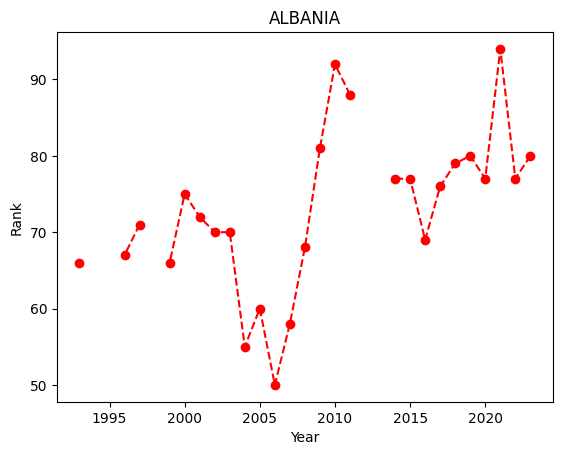

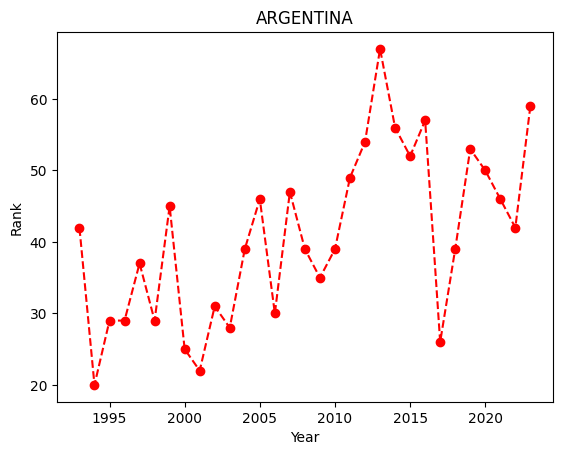

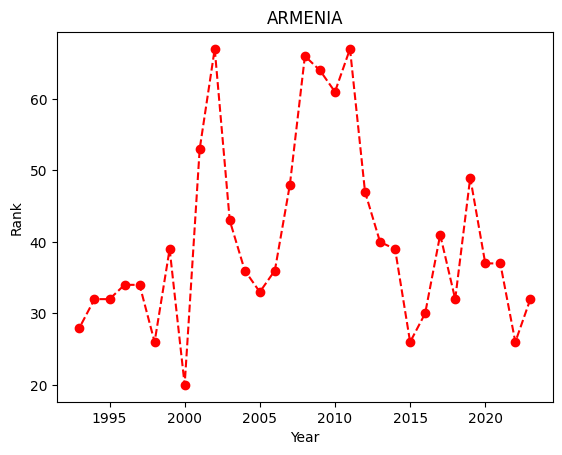

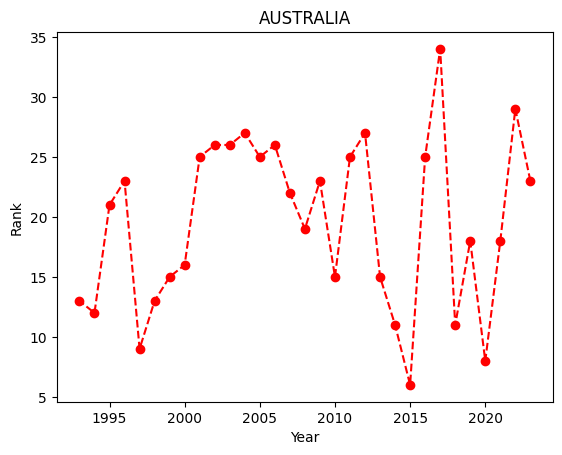

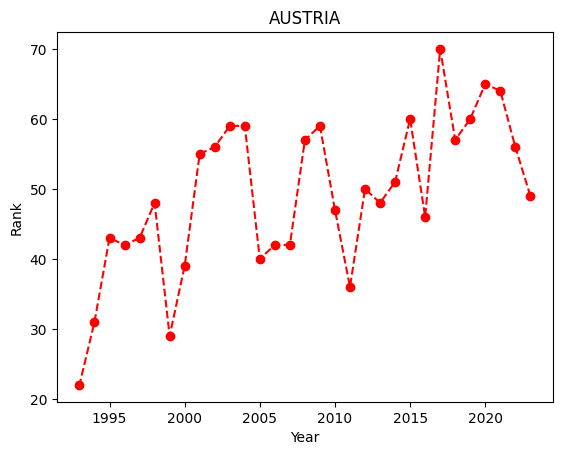

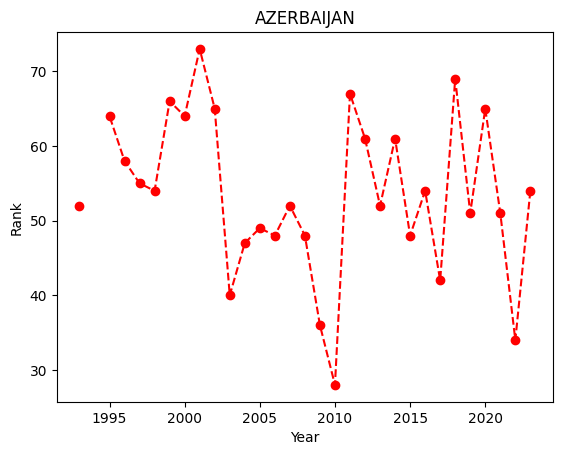

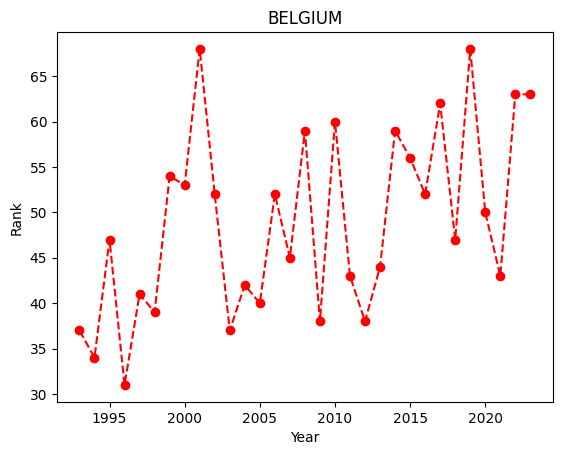

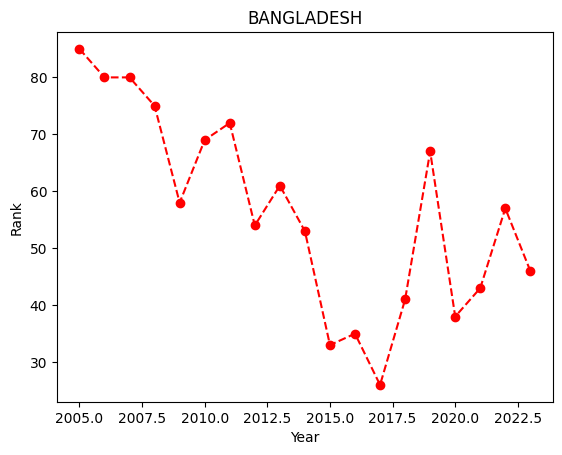

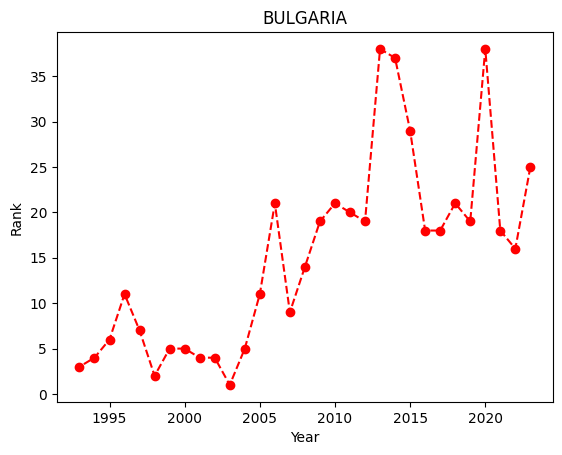

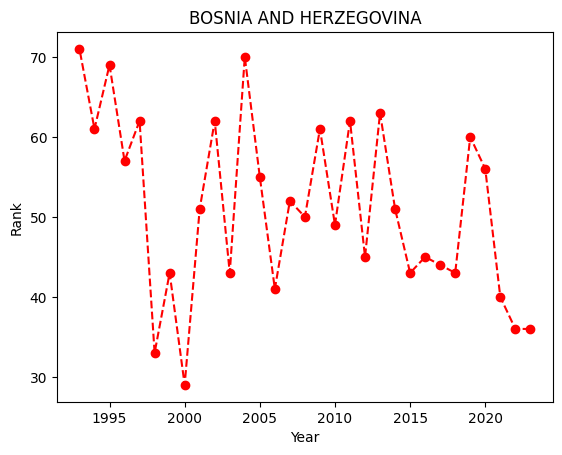

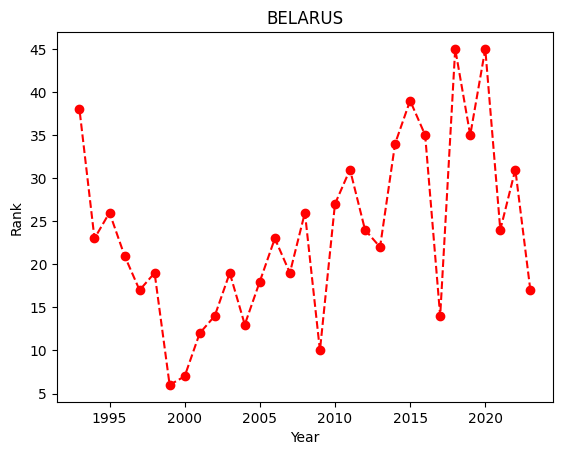

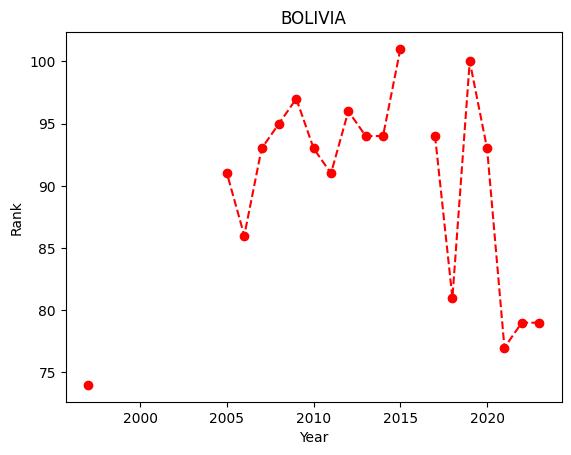

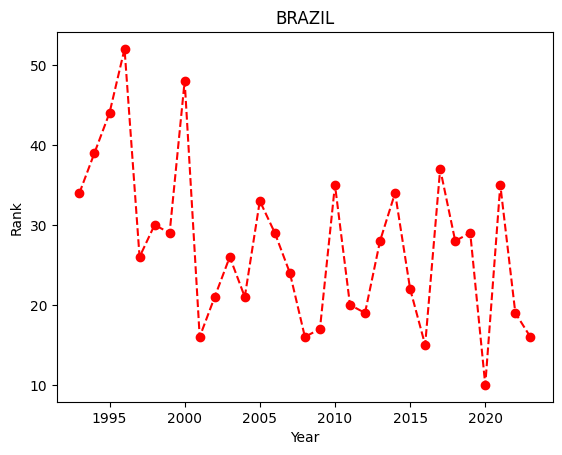

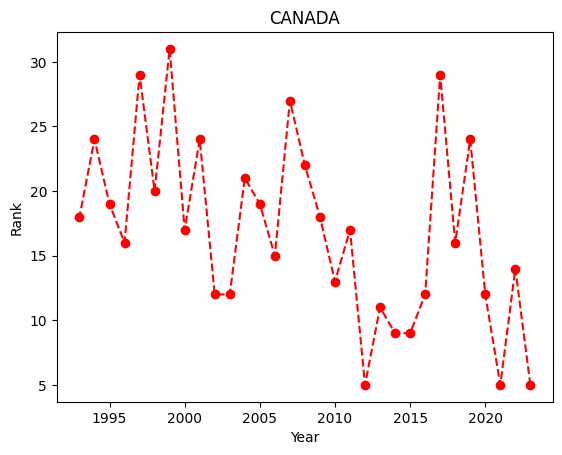

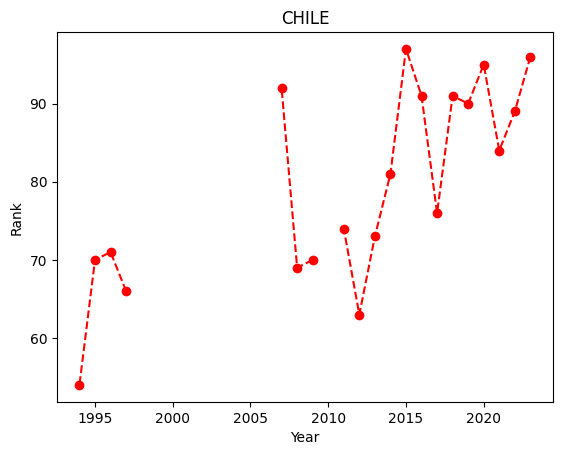

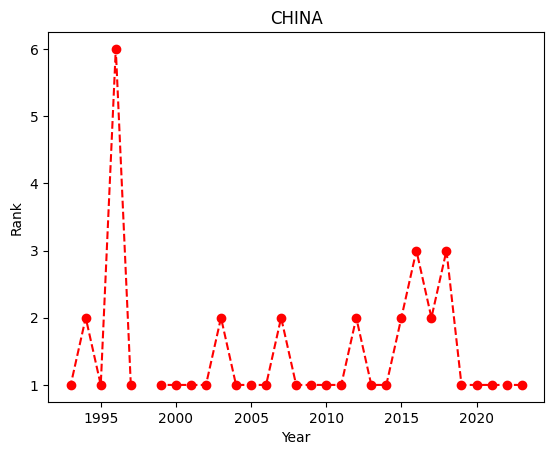

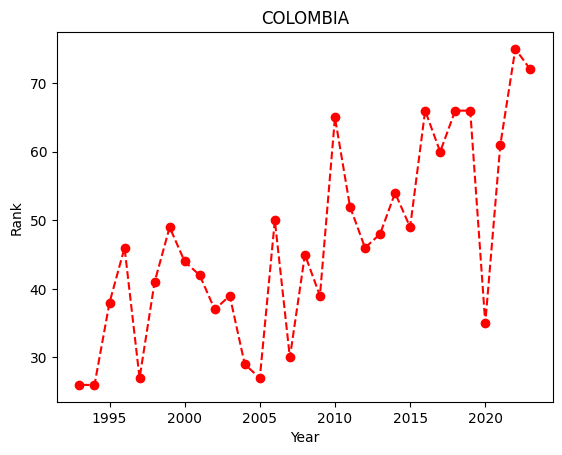

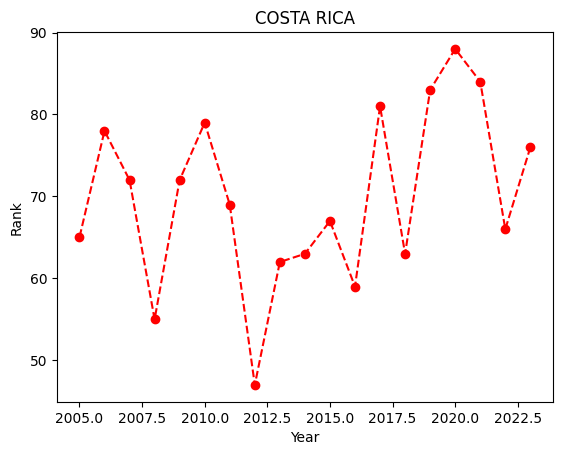

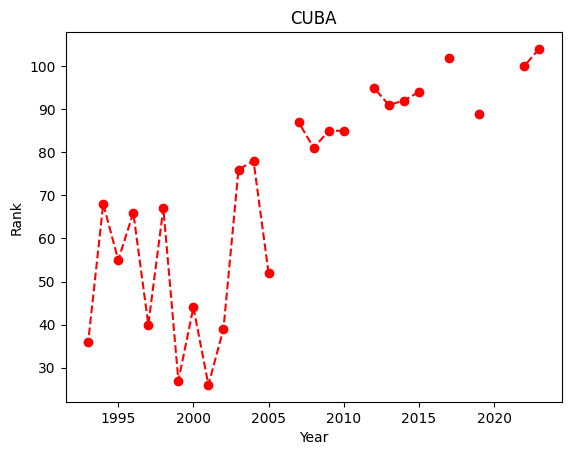

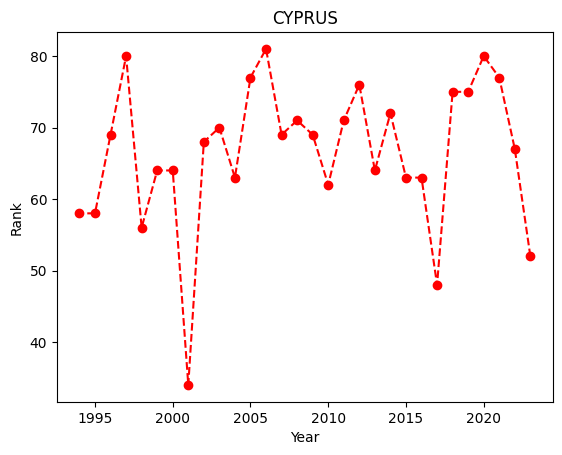

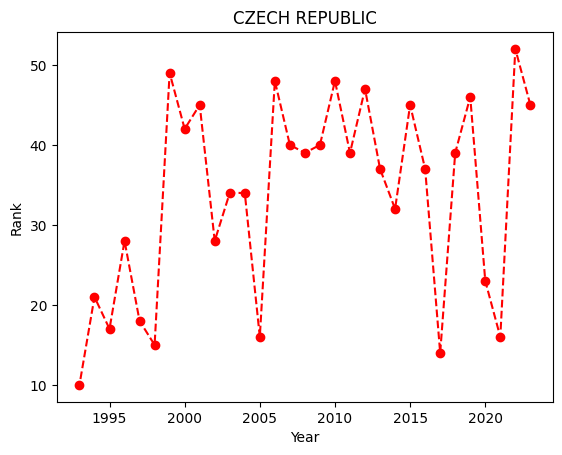

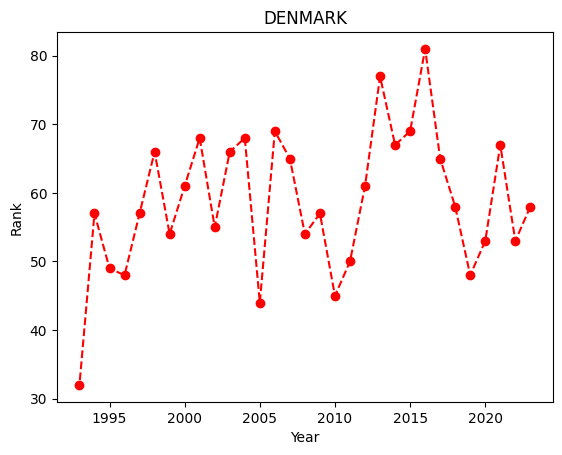

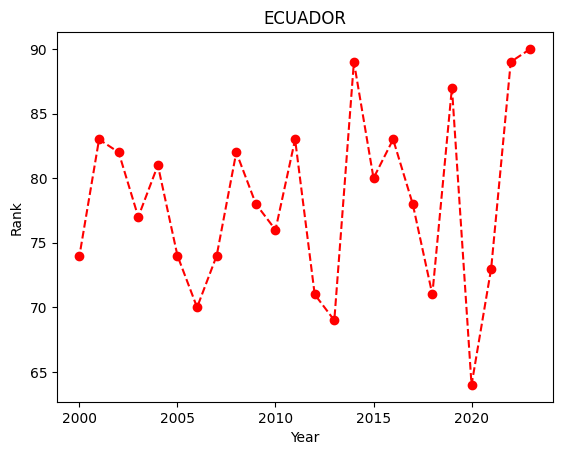

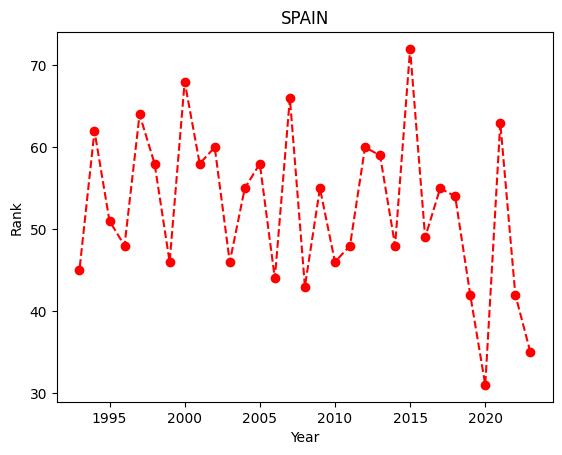

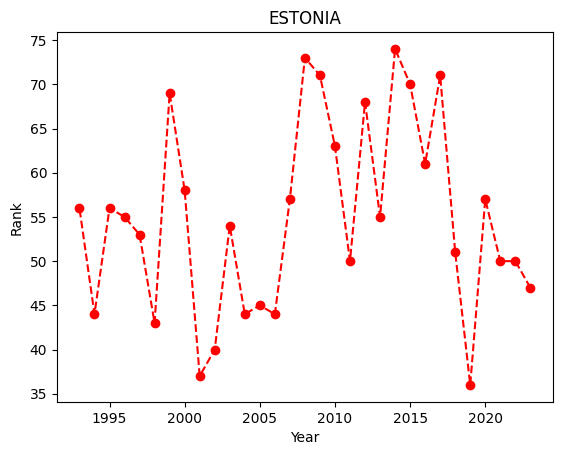

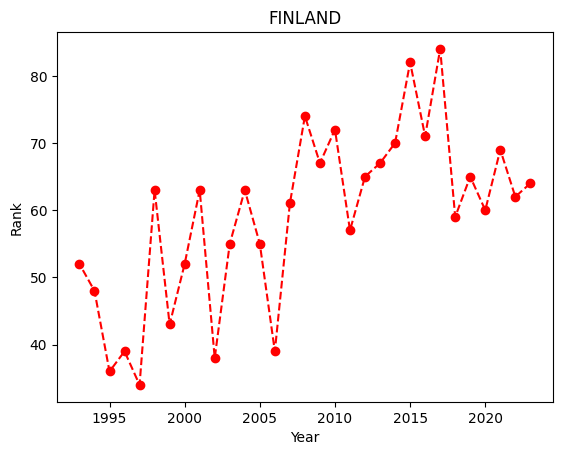

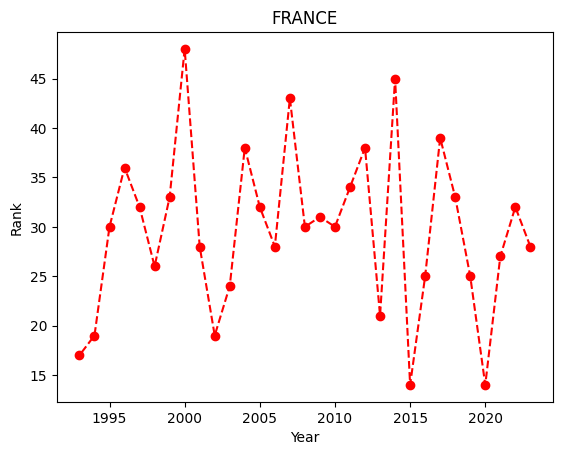

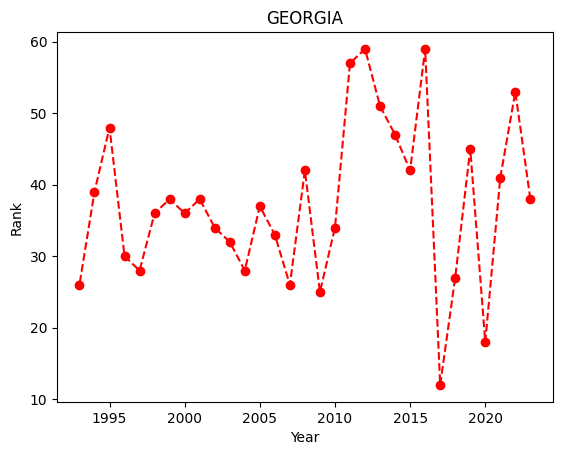

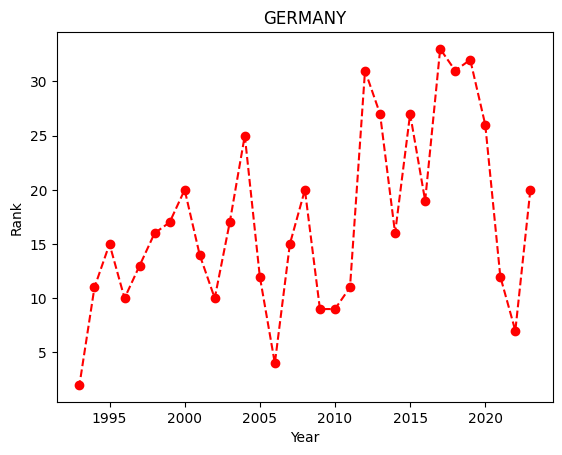

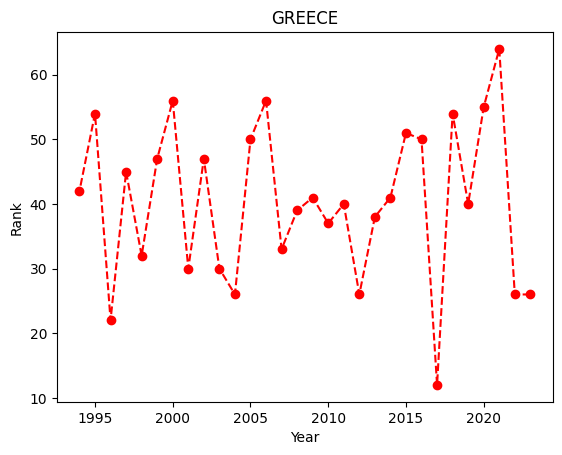

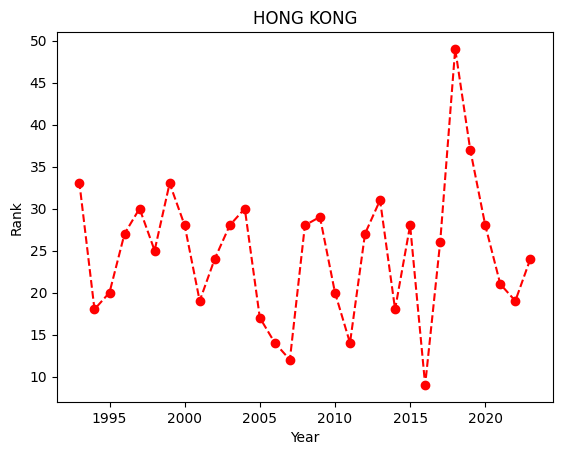

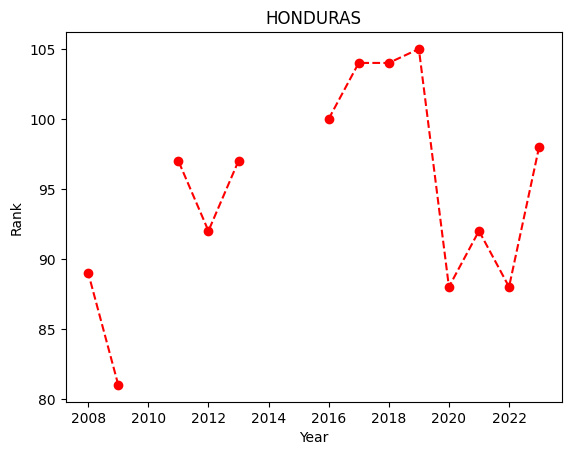

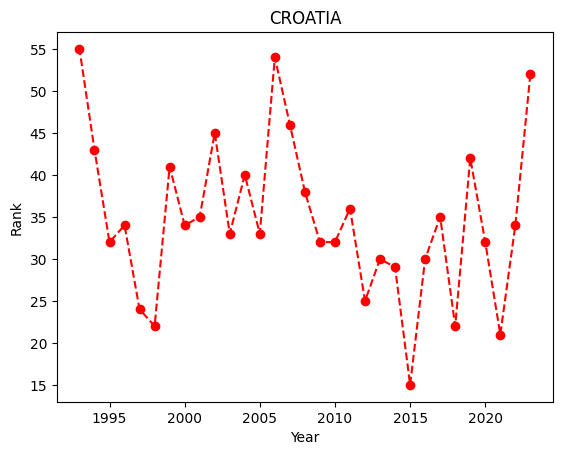

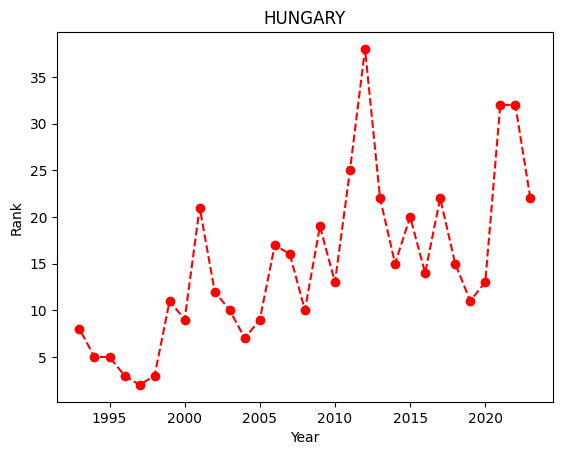

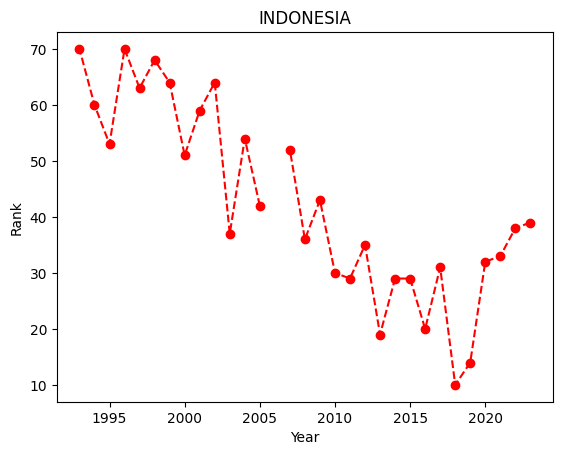

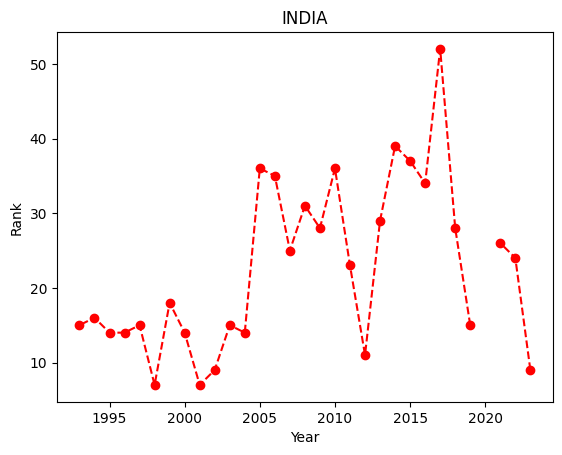

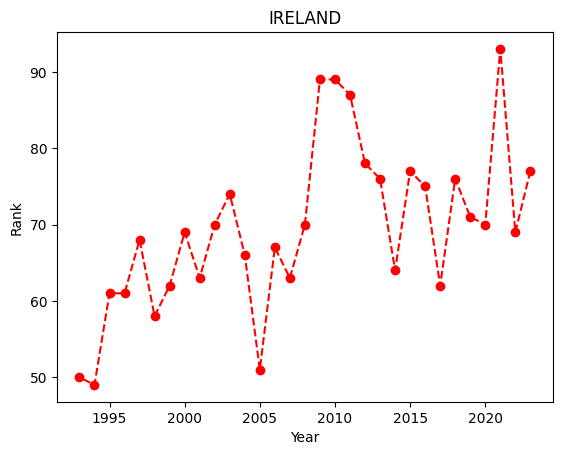

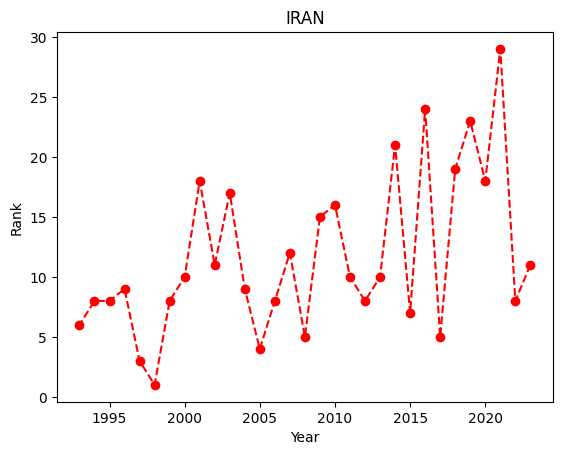

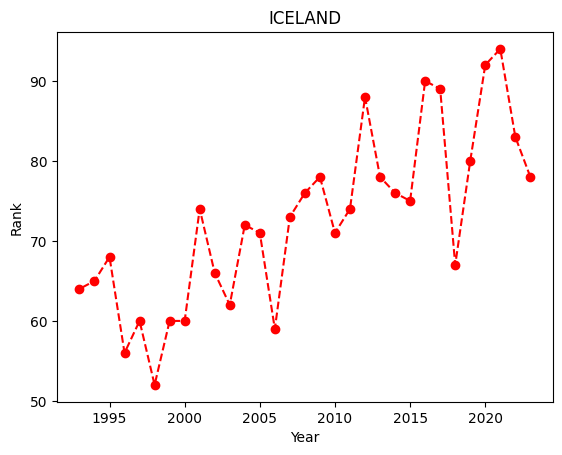

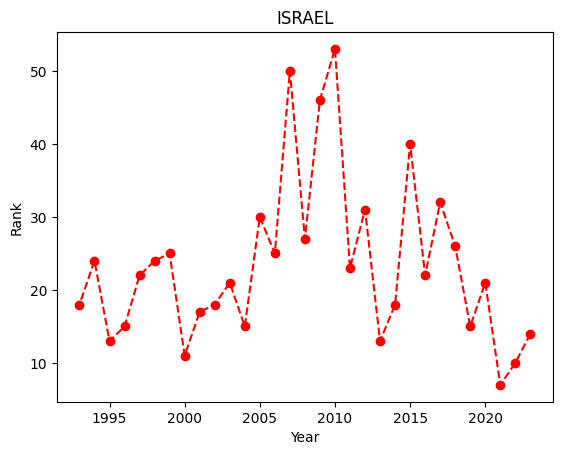

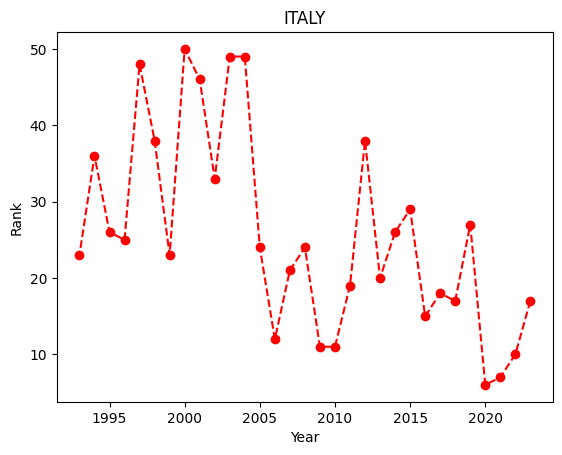

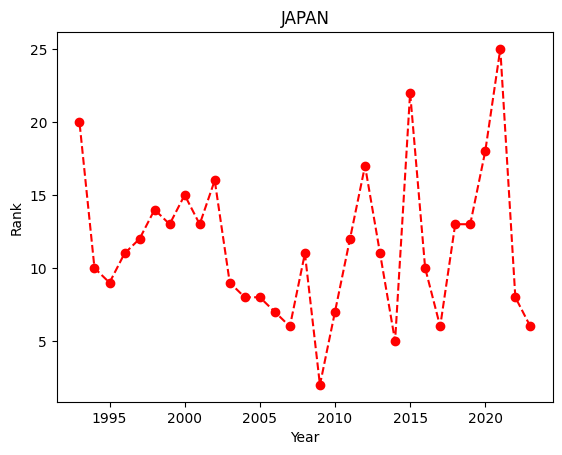

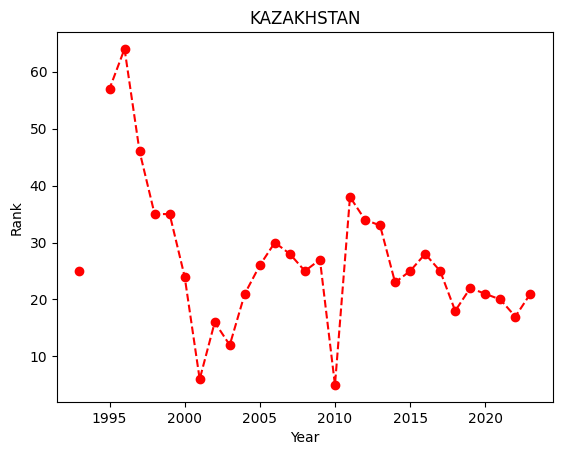

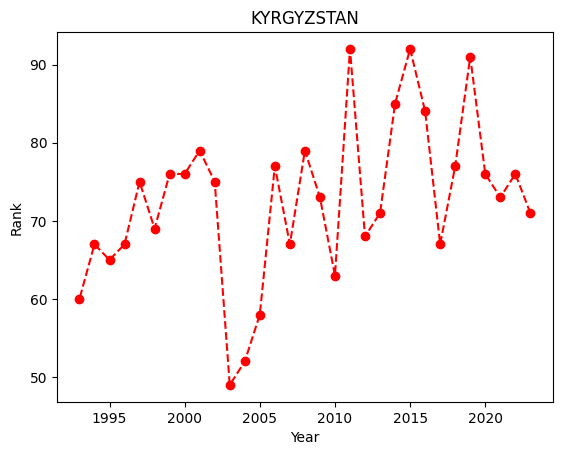

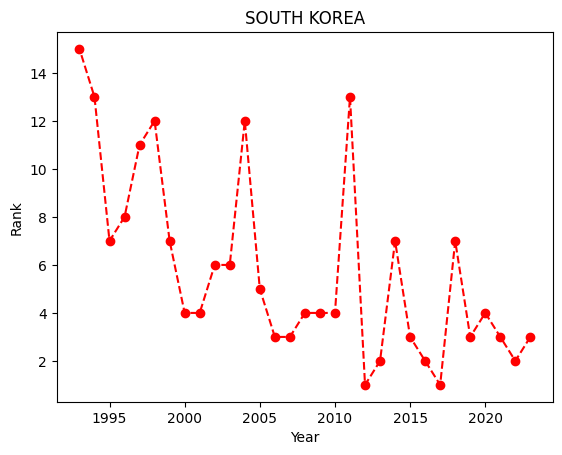

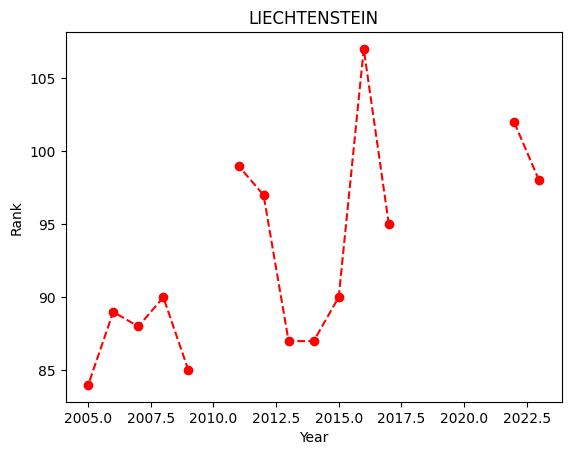

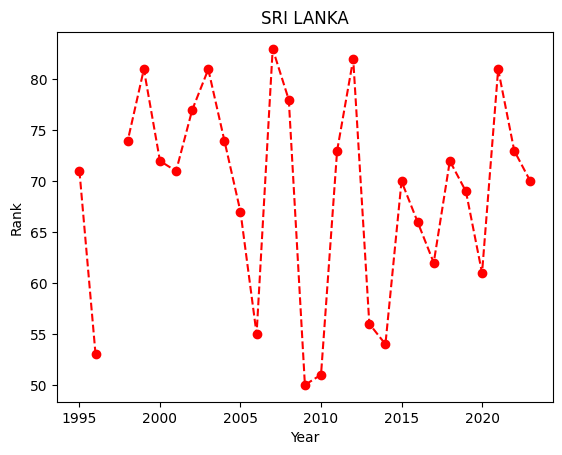

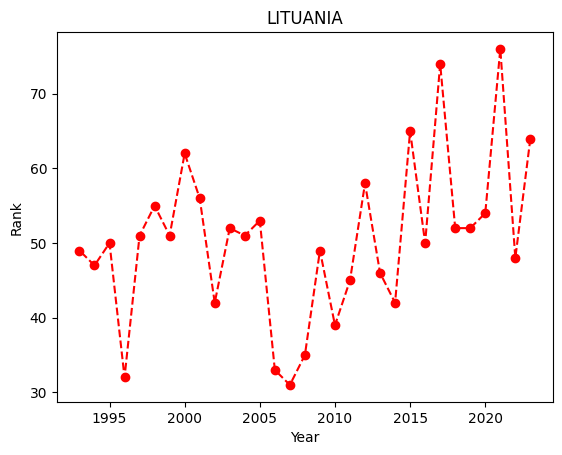

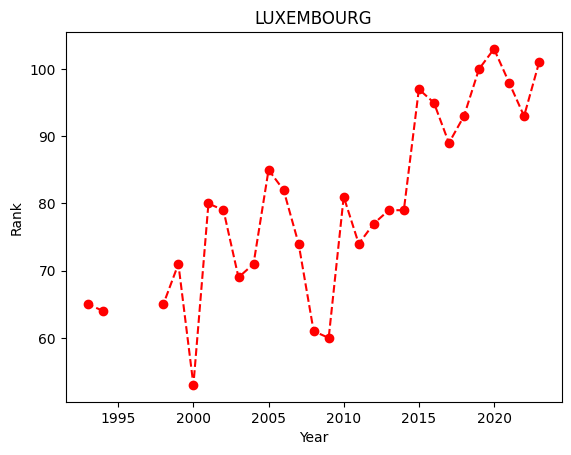

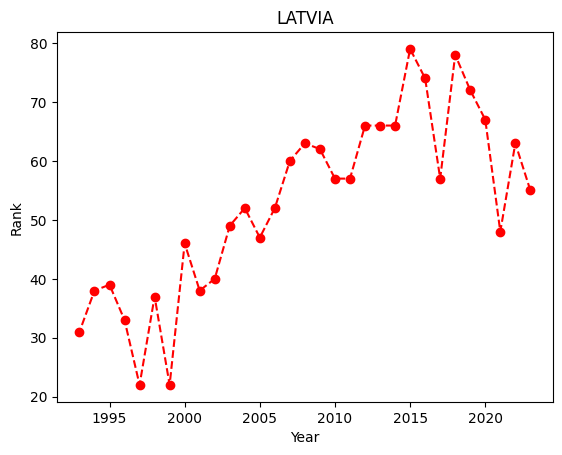

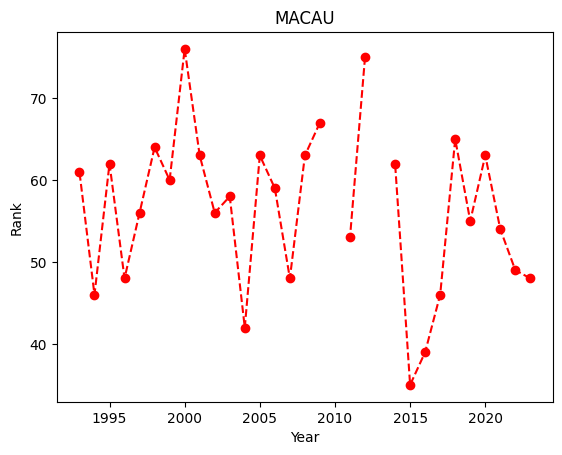

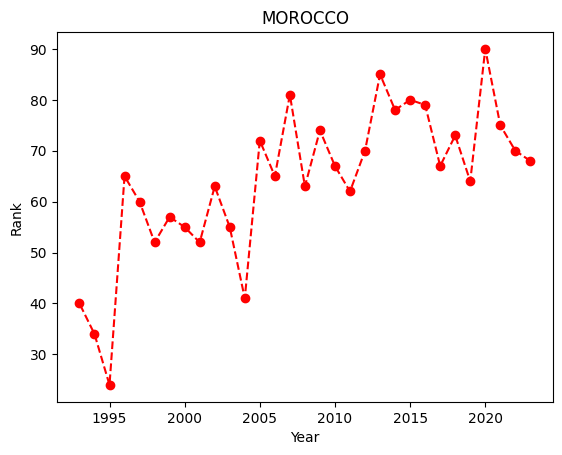

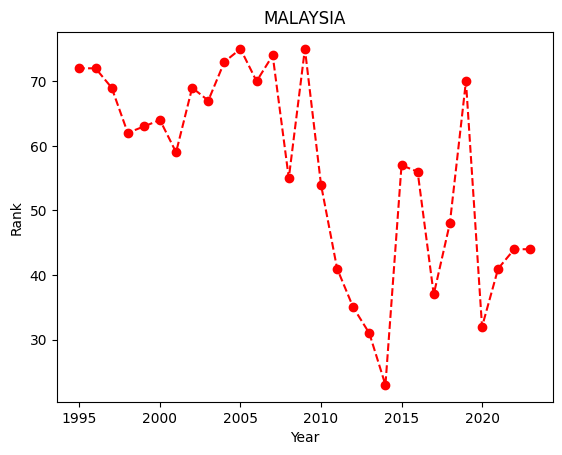

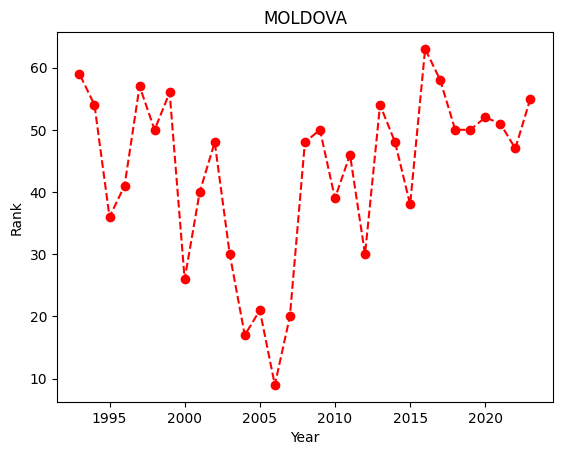

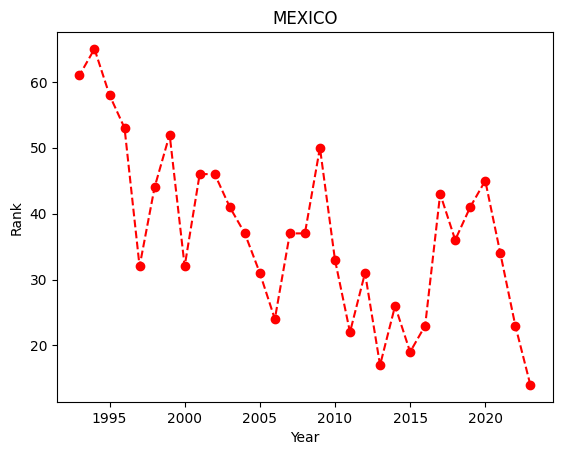

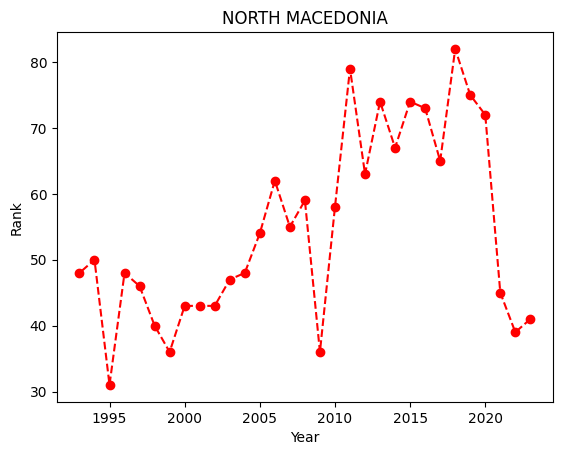

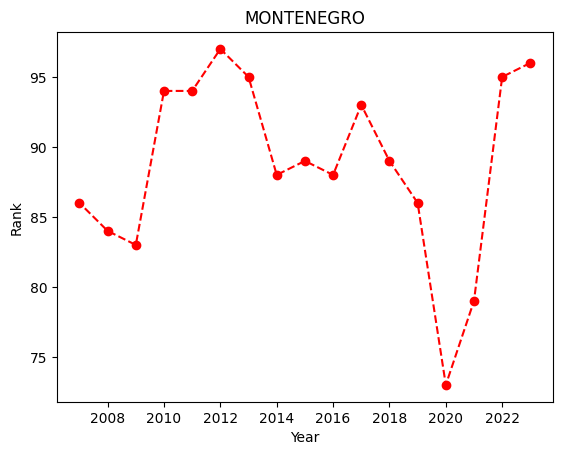

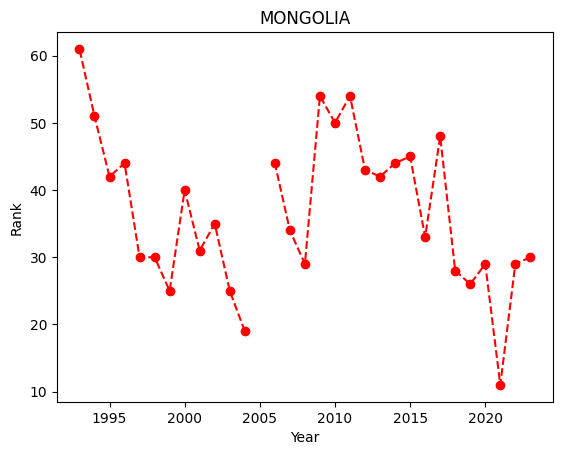

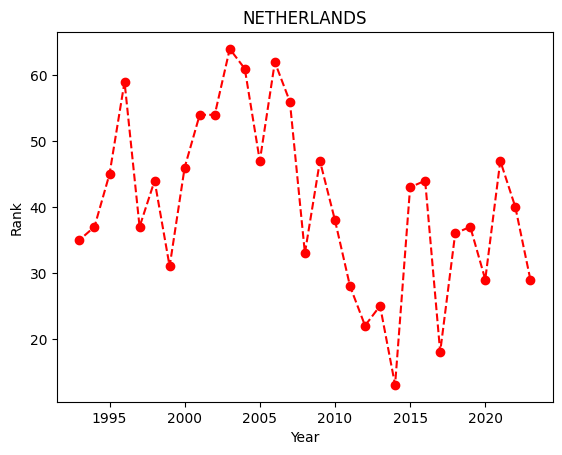

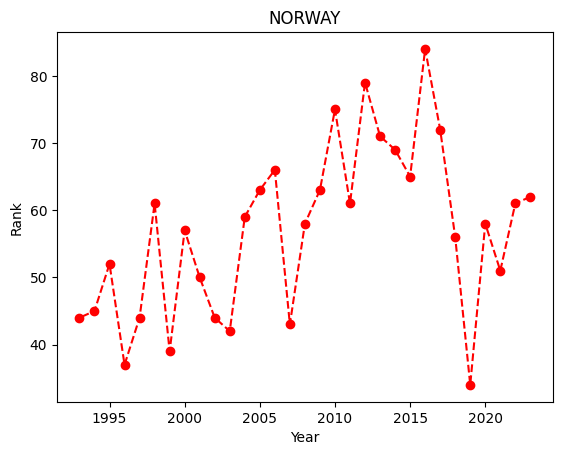

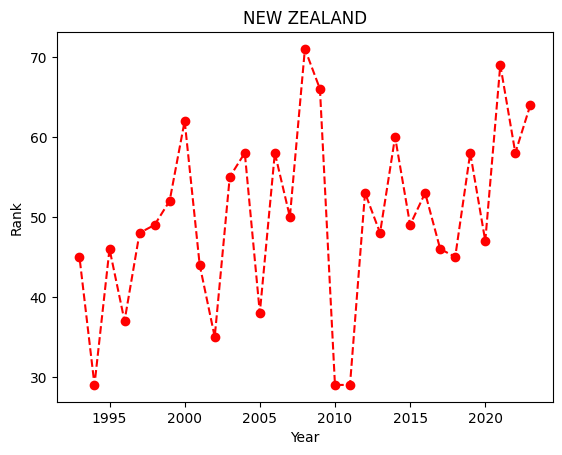

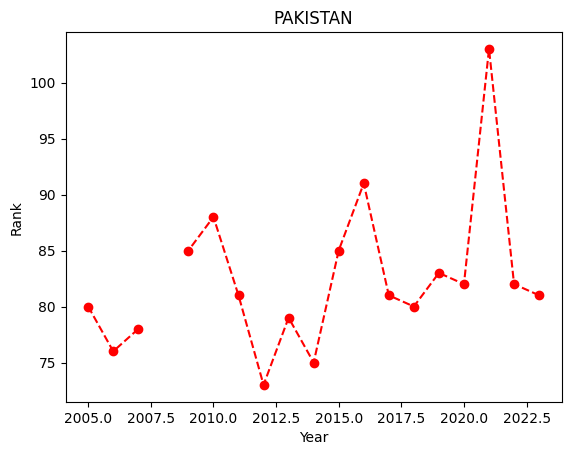

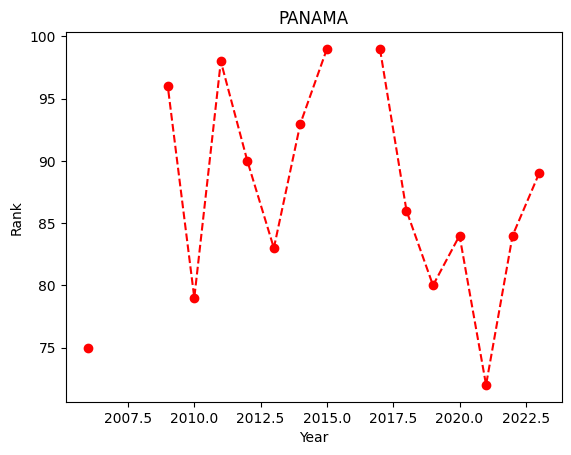

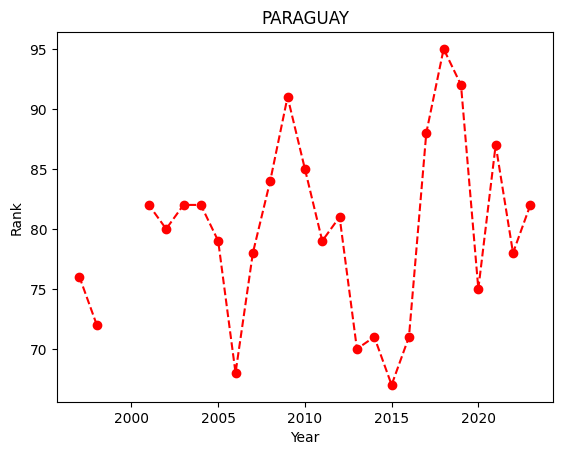

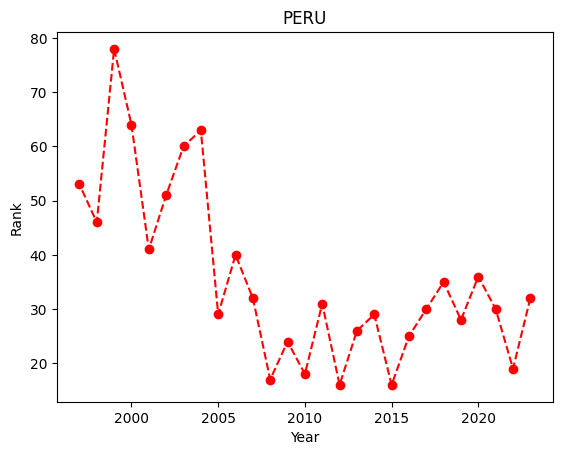

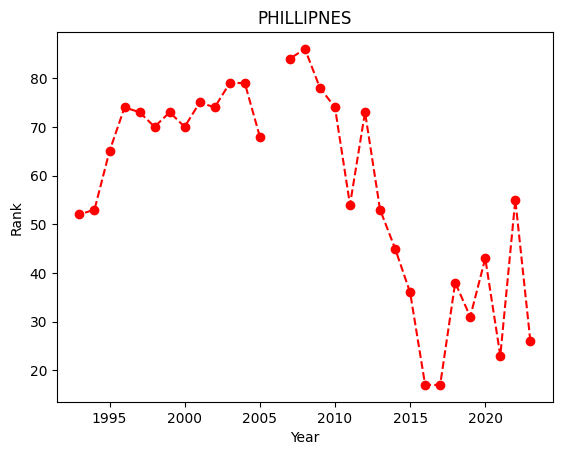

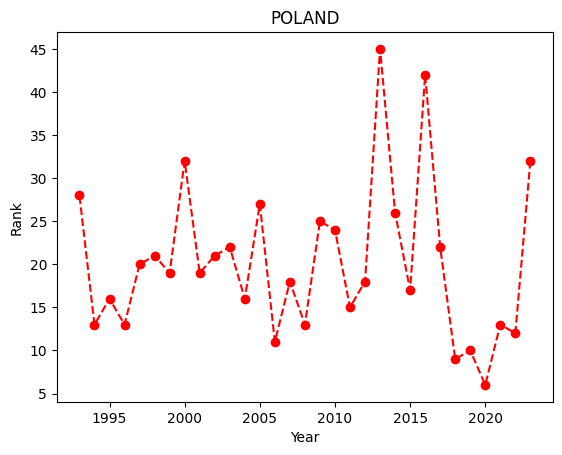

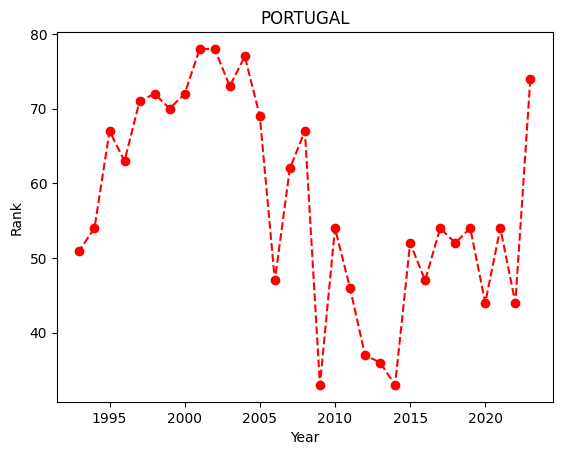

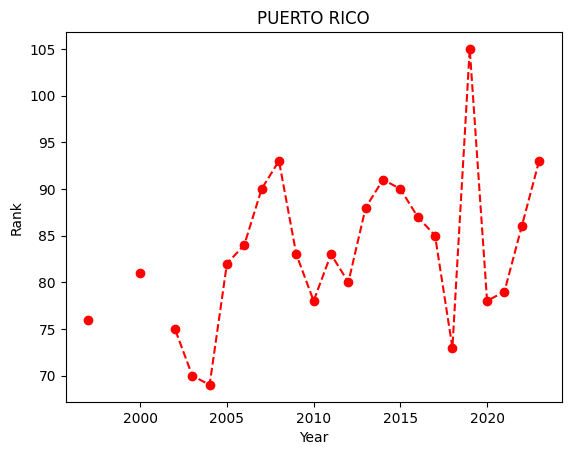

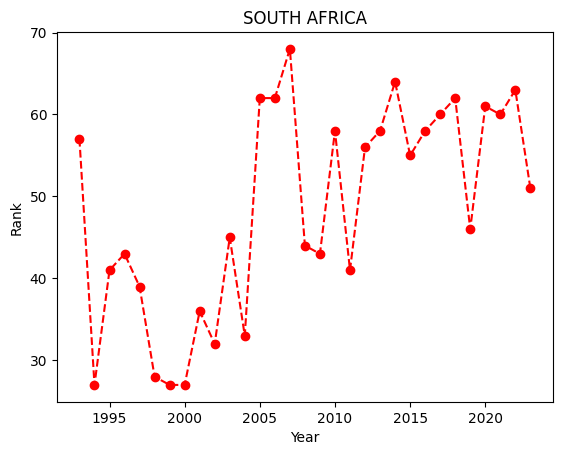

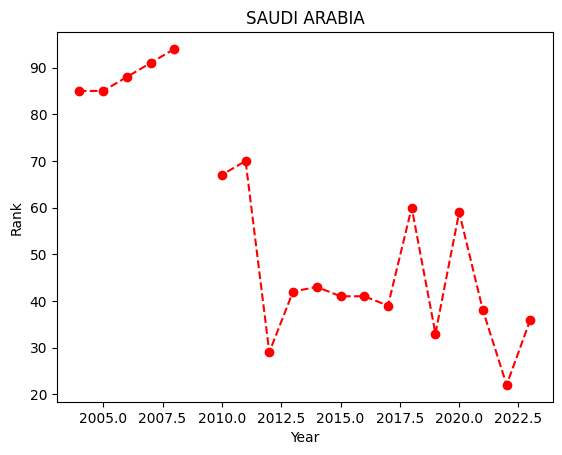

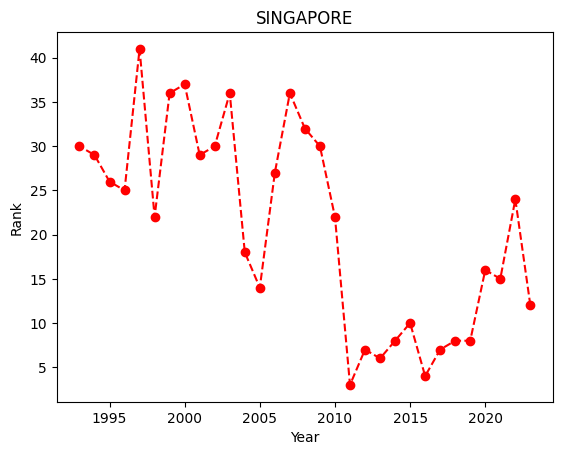

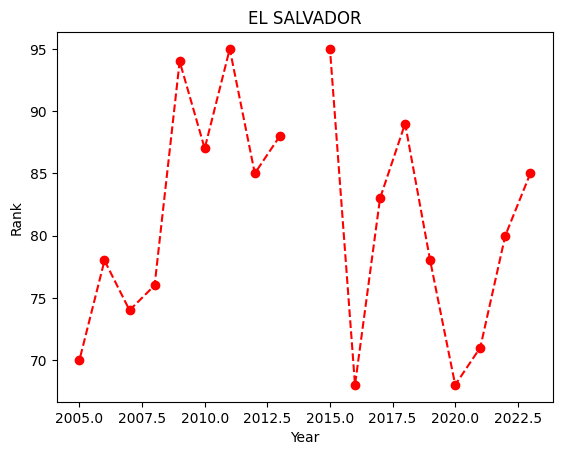

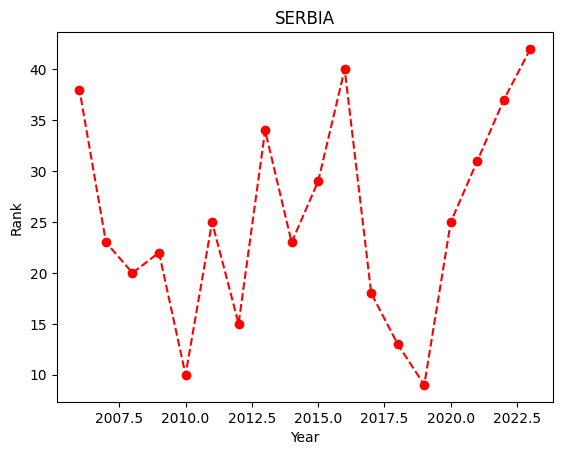

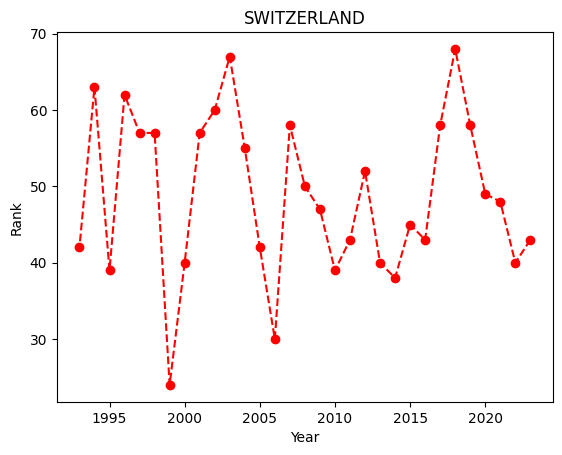

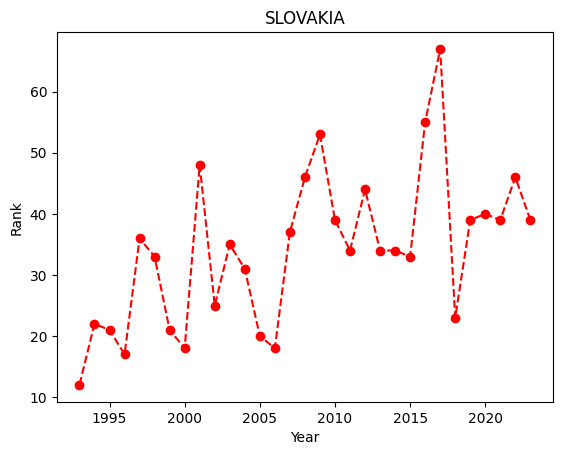

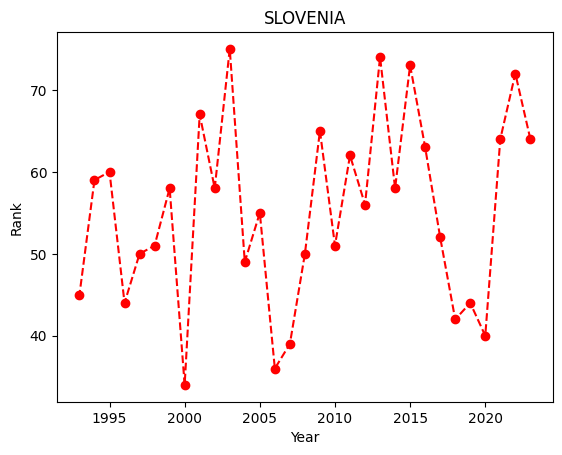

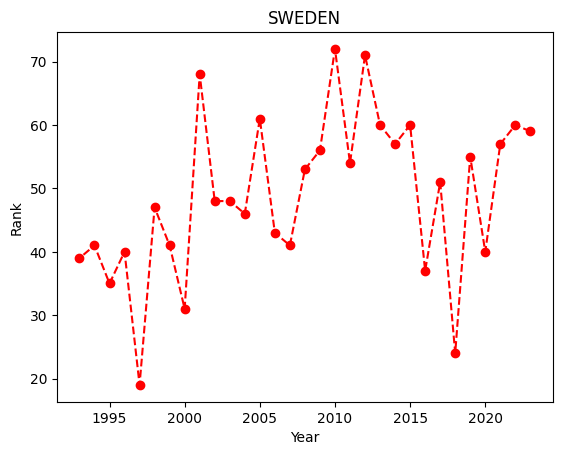

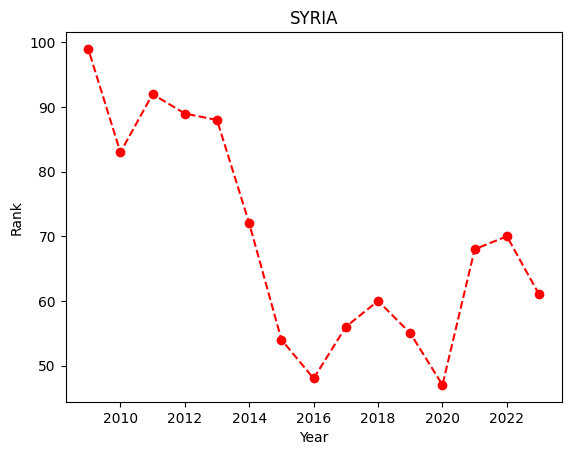

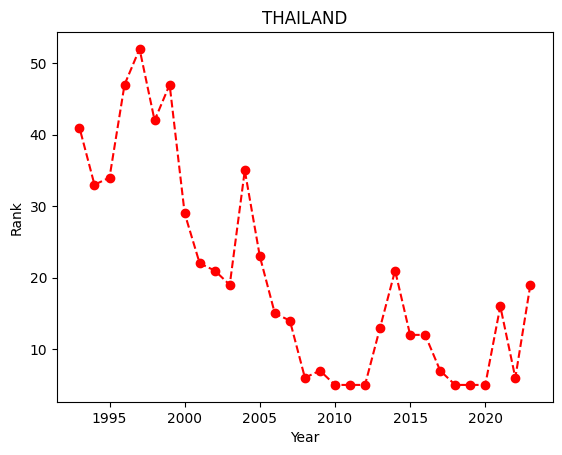

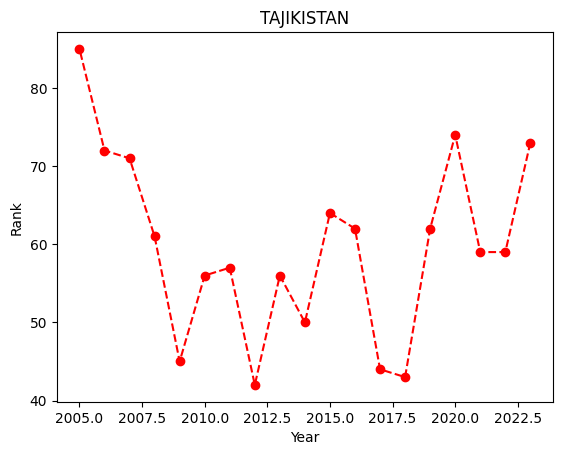

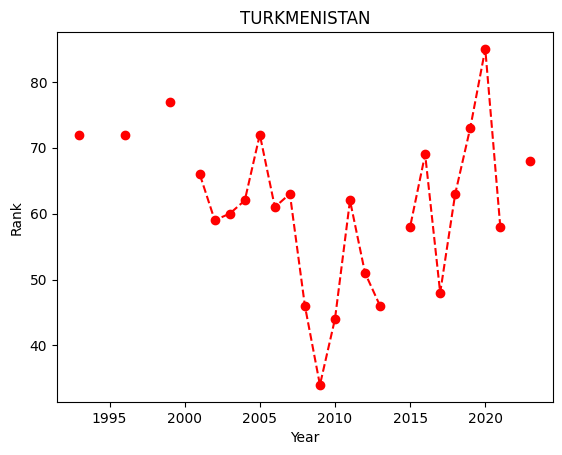

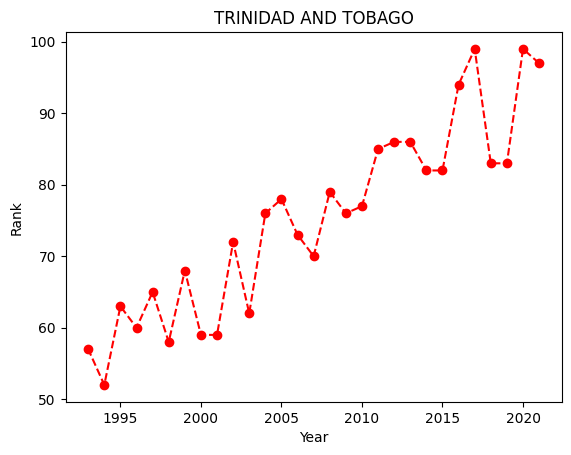

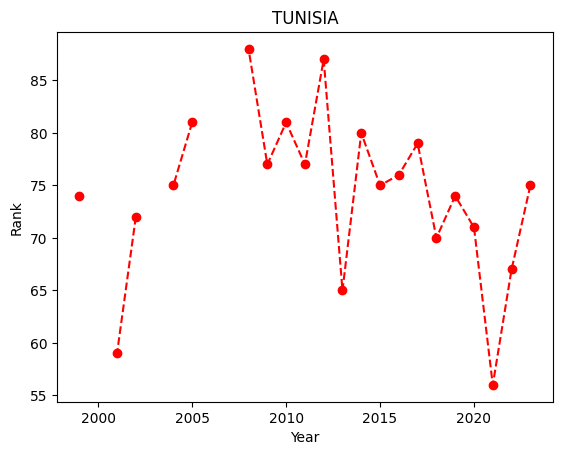

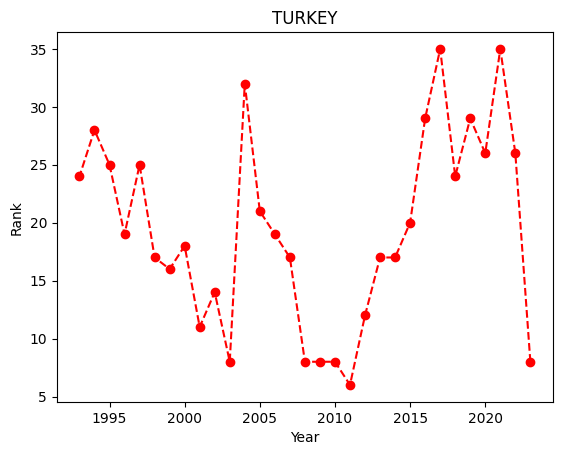

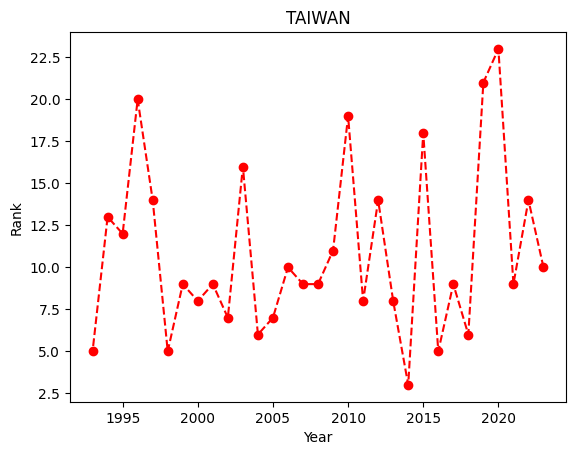

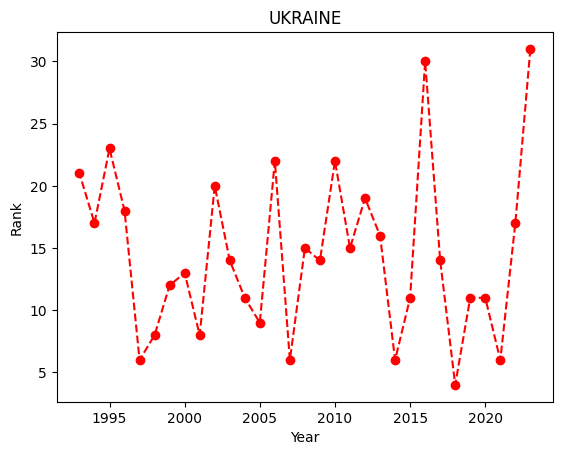

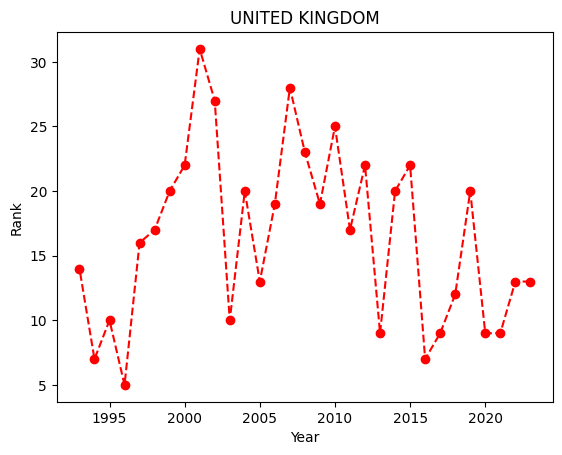

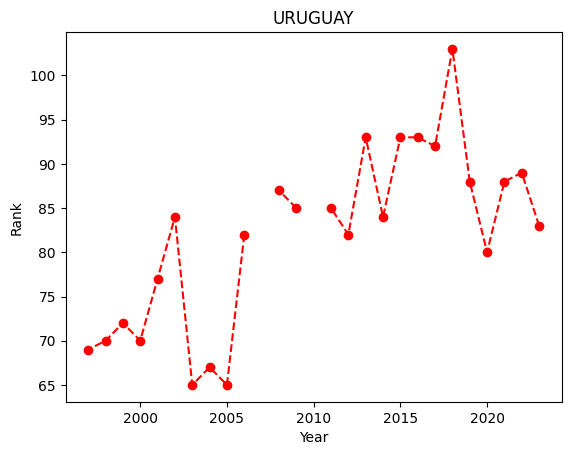

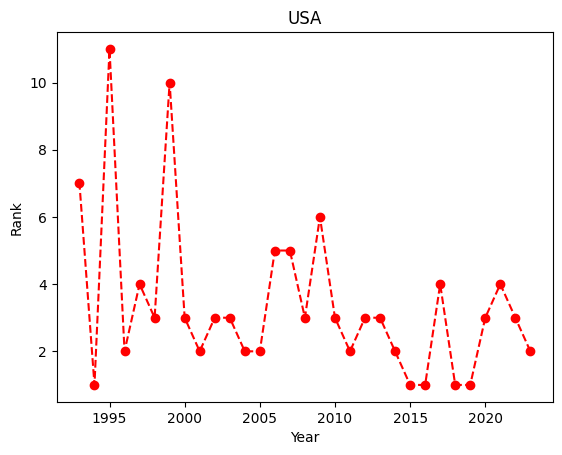

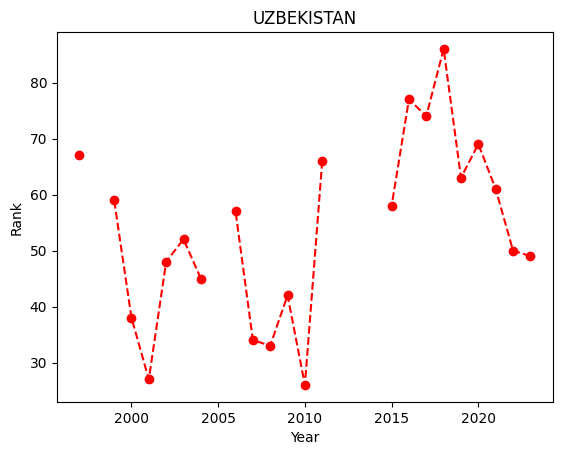

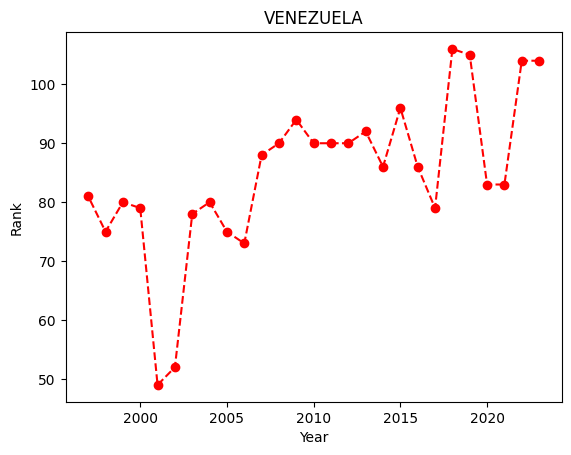

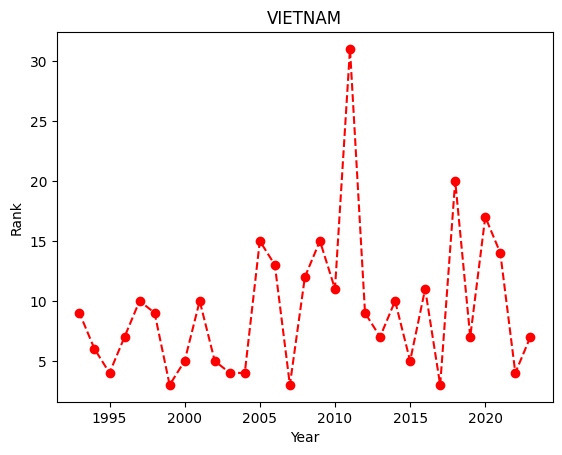

In [10]:
#Plotting each country's performance by year
for i in range (1,total_columns):   #start from 1 because column 0 is years
    plt.figure()    #separate graph for each iteration
    plt.plot(data.iloc[:,0],data.iloc[:,i], color='r', linestyle='--', marker ='o')  #year v rank
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.title(f'{data.columns[i] }')  #title country